### The Curse of Dimensionality

In [1]:
###### Define Numerical Python environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###### Define `datasets` of varying size using `make_classification`

from sklearn.datasets import make_classification

n_vals = np.logspace(1, 4, 20)

datasets = { 
    int(n): make_classification(int(n)) # returns a tuple
    for n in n_vals
}

In [4]:
np.linspace(1,10,20) # 20 evenly-spaced values from 1 to 10

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [6]:
np.linspace(1,4,20)

array([1.        , 1.15789474, 1.31578947, 1.47368421, 1.63157895,
       1.78947368, 1.94736842, 2.10526316, 2.26315789, 2.42105263,
       2.57894737, 2.73684211, 2.89473684, 3.05263158, 3.21052632,
       3.36842105, 3.52631579, 3.68421053, 3.84210526, 4.        ])

In [5]:
# create an exponentially increasing dataset
np.logspace(1,10,20) # 20 evenly log-spaced values from 10^1 to 10^10

array([1.00000000e+01, 2.97635144e+01, 8.85866790e+01, 2.63665090e+02,
       7.84759970e+02, 2.33572147e+03, 6.95192796e+03, 2.06913808e+04,
       6.15848211e+04, 1.83298071e+05, 5.45559478e+05, 1.62377674e+06,
       4.83293024e+06, 1.43844989e+07, 4.28133240e+07, 1.27427499e+08,
       3.79269019e+08, 1.12883789e+09, 3.35981829e+09, 1.00000000e+10])

In [3]:
# to check state
%whos

Variable              Type        Data/Info
-------------------------------------------
datasets              dict        n=20
make_classification   function    <function make_classifica<...>on at 0x000001A89CF6CAE8>
n_vals                ndarray     20: 20 elems, type `float64`, 160 bytes
np                    module      <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                    module      <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                   module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


In [7]:
###### Load models from Scikit-Learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [8]:
###### Define dictionary of models

models = {
    'knn' : KNeighborsClassifier(),
    'lr' : LogisticRegression(),
    'dt' : DecisionTreeClassifier(),
    'svm' : SVC(),
}

In [9]:
###### import `time` library

from time import time

In [11]:
###### Define functions to time fit and prediction

def time_fit(data, model): # data is a tuple
    start = time()
    model.fit(*data) # splat notation will "unpack" the tuple
    fit_time = time() - start
    return fit_time

def time_predict(data, model):
    start = time()
    model.predict(data[0]) # prediction only needs the X(sub i)
    predict_time = time() - start
    return predict_time

In [12]:
###### Define function to test all models on a dataset of size $n$

def fit_predict_model_on_n(model_name, n):
    
    model = models[model_name]
    dataset = datasets[n]
    
    fit_time = time_fit(dataset, model)
    
    predict_time = time_predict(dataset, model)
    
    return {
        'model_name' : model_name,
        'n' : n,
        'fit_time' : fit_time,
        'predict_time' : predict_time
    }

In [13]:
###### Run all models against all datasets 

results = []
for n in datasets.keys(): 
    for model in models.keys():
        results.append(fit_predict_model_on_n(model, n))

In [14]:
###### Collect results in a `DataFrame`

results_df = pd.DataFrame(results)

In [15]:
###### Display a sample of the results

results_df.sample(5)

,fit_time,model_name,n,predict_time
10,0.000000,dt,20,0.000000
1,0.004952,lr,10,0.000502
23,0.010372,svm,61,0.000000
52,0.004042,knn,1128,0.118371
36,0.000000,knn,263,0.005978


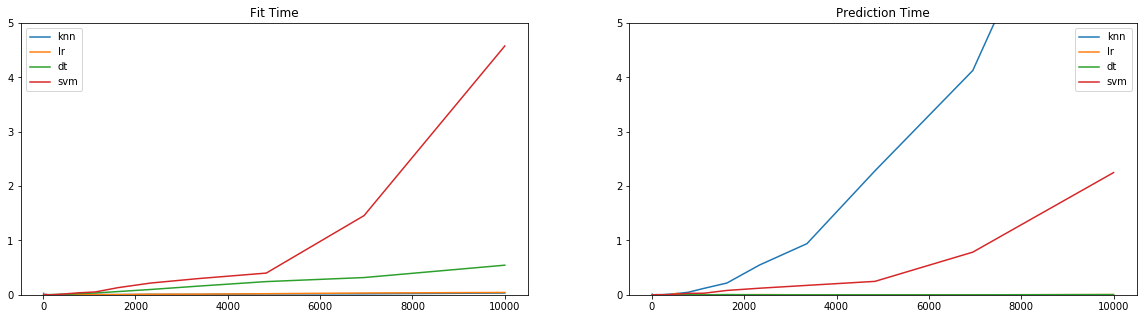

In [16]:
###### Plot Fit Time and Prediction Time

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

for model_name in results_df.model_name.unique():
    
    model_mask = (results_df.model_name == model_name)
    model_results_df = results_df[model_mask]

    ax1.set_title('Fit Time')
    ax1.plot(model_results_df.n, 
             model_results_df.fit_time, 
             label=model_name)
    ax1.set_ylim((0,5))
    ax1.legend()
    
    ax2.set_title('Prediction Time')
    ax2.set_ylim((0, 5))
    ax2.plot(model_results_df.n, 
             model_results_df.predict_time, 
             label=model_name)
    ax2.legend()
    
plt.show()    

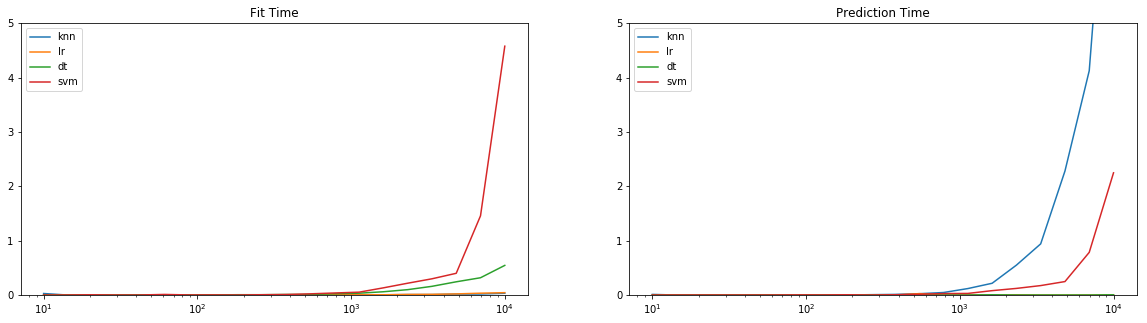

In [17]:
###### Plot Fit Time and Prediction Time with Logarithmic Scale for $n$

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

for model_name in results_df.model_name.unique():
    
    model_mask = (results_df.model_name == model_name)
    model_results_df = results_df[model_mask]
    
    ax1.set_title('Fit Time')
    ax1.plot(model_results_df.n, 
             model_results_df.fit_time, 
             label=model_name)
    ax1.set_xscale('log')
    ax1.set_ylim((0, 5))
    ax1.legend()
    
    ax2.set_title('Prediction Time')
    ax2.plot(model_results_df.n, 
             model_results_df.predict_time, 
             label=model_name)
    ax2.set_xscale('log')
    ax2.set_ylim((0, 5))
    ax2.legend()

plt.show()    